In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null


In [ ]:
!ls


CSMA_Simulator.java  sample_data


In [ ]:
!sudo apt-get update
!sudo apt-get install -y openjdk-8-jdk


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpad

In [ ]:
!wget -q https://sourceforge.net/projects/jfreechart/files/1.5.3/jfreechart-1.5.3.jar/download -O jfreechart-1.5.3.jar


In [ ]:
!java -version


openjdk version "11.0.25" 2024-10-15
OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
csma_code = """
import java.util.Random;
import java.util.Scanner;
import java.util.concurrent.Semaphore;
import java.io.FileWriter;
import java.io.IOException;

public class CSMA_Simulator {
    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);

        // User input for simulation parameters
        System.out.print("Enter number of devices: ");
        int numDevices = scanner.nextInt();

        System.out.print("Enter maximum number of attempts per device: ");
        int maxAttempts = scanner.nextInt();

        System.out.print("Enter simulation time in milliseconds: ");
        int simulationTime = scanner.nextInt();

        System.out.print("Enter collision probability (0-100): ");
        int collisionProbability = scanner.nextInt();

        System.out.print("Enter backoff factor (exponential multiplier): ");
        int backoffFactor = scanner.nextInt();

        Semaphore channel = new Semaphore(1);
        Thread[] devices = new Thread[numDevices];
        int[] successCounts = new int[numDevices];
        long startTime = System.currentTimeMillis();

        for (int i = 0; i < numDevices; i++) {
            int deviceId = i;
            devices[i] = new Thread(() -> {
                Random random = new Random();
                int attempts = 0;

                while (attempts < maxAttempts && System.currentTimeMillis() - startTime < simulationTime) {
                    try {
                        if (channel.tryAcquire()) {
                            if (random.nextInt(100) < collisionProbability) {
                                System.out.println("Device " + deviceId + ": Collision occurred.");
                                channel.release();
                                attempts++;
                                Thread.sleep(backoffFactor * (attempts * 100));
                            } else {
                                successCounts[deviceId]++;
                                System.out.println("Device " + deviceId + ": Successful transmission.");
                                Thread.sleep(1000);
                                channel.release();
                            }
                        } else {
                            Thread.sleep(500);
                        }
                    } catch (InterruptedException e) {
                        e.printStackTrace();
                    }
                }
            });
            devices[i].start();
        }

        for (Thread device : devices) {
            try {
                device.join();
            } catch (InterruptedException e) {
                e.printStackTrace();
            }
        }

        try (FileWriter writer = new FileWriter("simulation_output.txt")) {
            for (int i = 0; i < numDevices; i++) {
                String result = "Device " + i + ": " + successCounts[i] + " successful transmissions.";
                System.out.println(result);
                writer.write(result + "\n");
            }
        } catch (IOException e) {
            e.printStackTrace();
        }

        scanner.close();
    }
}
"""
with open("CSMA_Simulator.java", "w") as file:
    file.write(csma_code)


In [ ]:
!javac -cp .:jfreechart-1.5.3.jar:jcommon-1.0.23.jar CSMA_Simulator.java


error: error reading jfreechart-1.5.3.jar; zip file is empty
error: error reading jcommon-1.0.23.jar; zip file is empty


In [ ]:
!ls -lh jfreechart-1.5.3.jar
!ls -lh jcommon-1.0.23.jar


-rw-r--r-- 1 root root 0 Dec  7 18:24 jfreechart-1.5.3.jar
-rw-r--r-- 1 root root 0 Dec  7 18:25 jcommon-1.0.23.jar


In [ ]:
!pip install matplotlib


In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()


Saving simulation_output.txt to simulation_output.txt


In [ ]:
!wget -q https://sourceforge.net/projects/jfreechart/files/1.5.3/jcommon-1.0.23.jar/download -O jcommon-1.0.23.jar


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the JAR files

Saving jfreechart-1.5.3.jar to jfreechart-1.5.3.jar


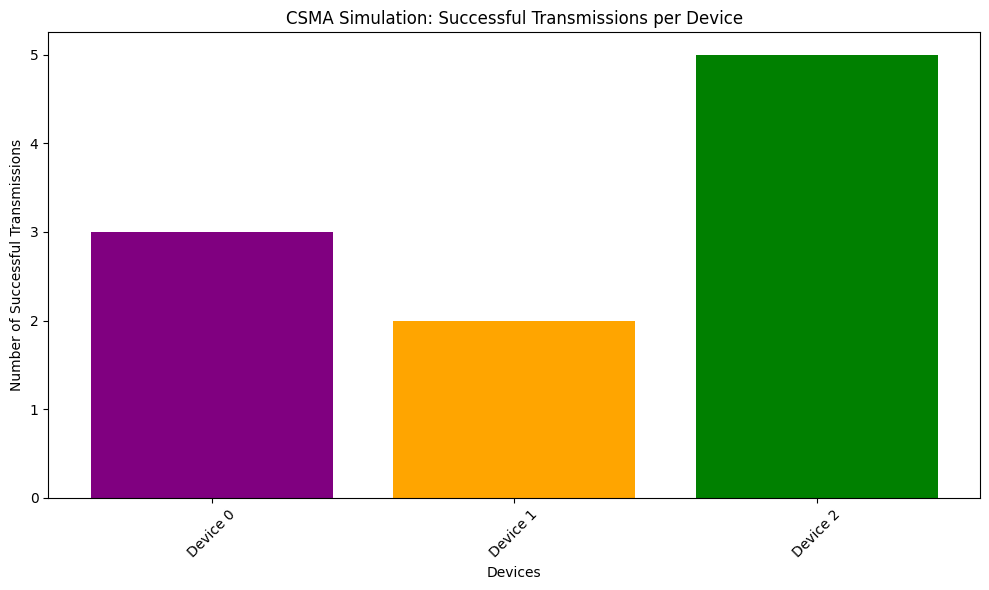

In [ ]:
import matplotlib.pyplot as plt
import random

# Define the file path where the data is stored (uploaded in Colab)
file_path = "/content/simulation_output.txt"  # Adjust the file name if needed

# Read and parse the file data
success_counts = {}
try:
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line.startswith("Device") and "successful transmissions" in line:
                try:
                    parts = line.split(":")
                    device = parts[0].strip()
                    count = int(parts[1].strip().split()[0])  # Extract the number of successful transmissions
                    success_counts[device] = count
                except (IndexError, ValueError) as e:
                    print(f"Error parsing line: '{line}' - {e}")
except FileNotFoundError:
    print(f"File not found: {file_path}")

# Check if data was parsed successfully
if not success_counts:
    print("No valid data found in the file. Please check the file contents.")
else:
    # Extract data for plotting
    devices = list(success_counts.keys())
    counts = list(success_counts.values())

    # Define a list of colors for different devices
    colors = ['purple', 'orange', 'green', 'blue', 'red', 'cyan', 'magenta', 'yellow', 'black']

    # Assign a color to each device (cycle through the colors if more devices exist)
    device_colors = [colors[i % len(colors)] for i in range(len(devices))]

    # Plot the graph (using a bar chart for CSMA simulation output)
    plt.figure(figsize=(10, 6))
    plt.bar(devices, counts, color=device_colors)

    plt.title("CSMA Simulation: Successful Transmissions per Device")
    plt.xlabel("Devices")
    plt.ylabel("Number of Successful Transmissions")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the graph
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the JAR files

Saving jcommon-1.0.23.jar to jcommon-1.0.23.jar


In [ ]:
!ls -lh


total 1.9M
-rw-r--r-- 1 root root 4.0K Dec  7 17:55 CSMA_Simulator.java
-rw-r--r-- 1 root root 323K Dec  7 18:45 jcommon-1.0.23.jar
-rw-r--r-- 1 root root 1.6M Dec  7 18:44 jfreechart-1.5.3.jar
drwxr-xr-x 1 root root 4.0K Dec  5 14:24 sample_data


In [ ]:
!javac -cp .:jfreechart-1.5.3.jar:jcommon-1.0.23.jar CSMA_Simulator.java


In [ ]:
!java -cp .:jfreechart-1.5.3.jar:jcommon-1.0.23.jar CSMA_Simulator


Enter number of devices: 3
Enter maximum number of attempts per device: 4
Enter simulation time in milliseconds: 5
Enter collision probability (0-100): 20
Enter backoff factor (exponential multiplier): 5
Device 0: 0 successful transmissions.
Device 1: 0 successful transmissions.
Device 2: 0 successful transmissions.
